In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 
Описание датасетов:

Yoga: Набор данных содержит временные ряды, описывающие движения при смене поз йоги. Каждый ряд соответствует актеру, а данные представлены в виде одномерных временных рядов. Крайний левый столбец — метки классов, остальные — временные шаги.
Wine: Набор данных содержит спектрограммы, классифицирующие сорта вин по регионам. Каждый ряд — это спектрограмма, где ось X — длина волны, ось Y — уровень поглощения.


In [2]:
# Загрузка данных
wine_train = pd.read_csv('WineTRAIN.csv', header=None)
wine_test = pd.read_csv('WineTEST.csv', header=None)
yoga_train = pd.read_csv('yogaTRAIN.csv', header=None)
yoga_test = pd.read_csv('yogaTEST.csv', header=None)

# Проверка структуры данных
print("Wine Train Shape:", wine_train.shape)
print("Wine Test Shape:", wine_test.shape)
print("Yoga Train Shape:", yoga_train.shape)
print("Yoga Test Shape:", yoga_test.shape)

Wine Train Shape: (57, 235)
Wine Test Shape: (54, 235)
Yoga Train Shape: (300, 427)
Yoga Test Shape: (3000, 427)


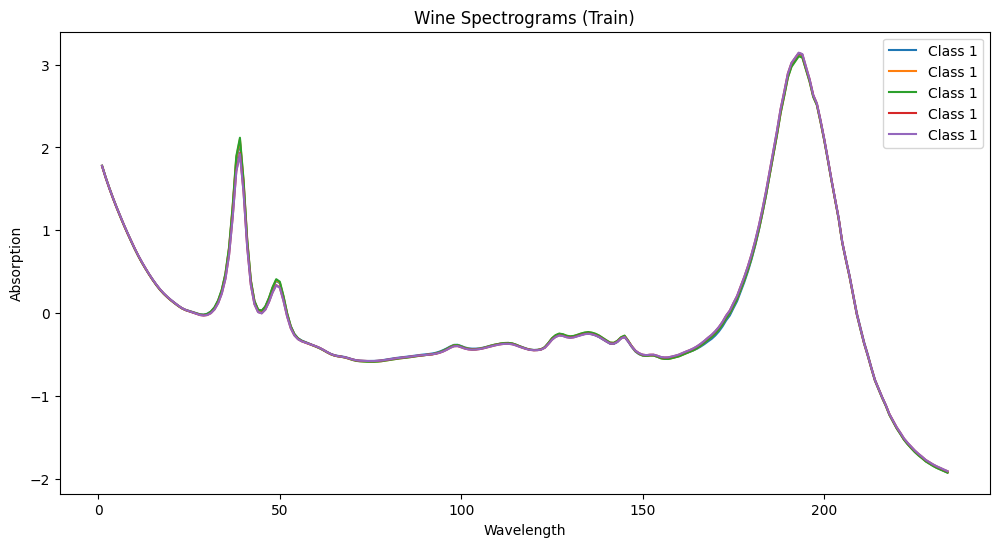

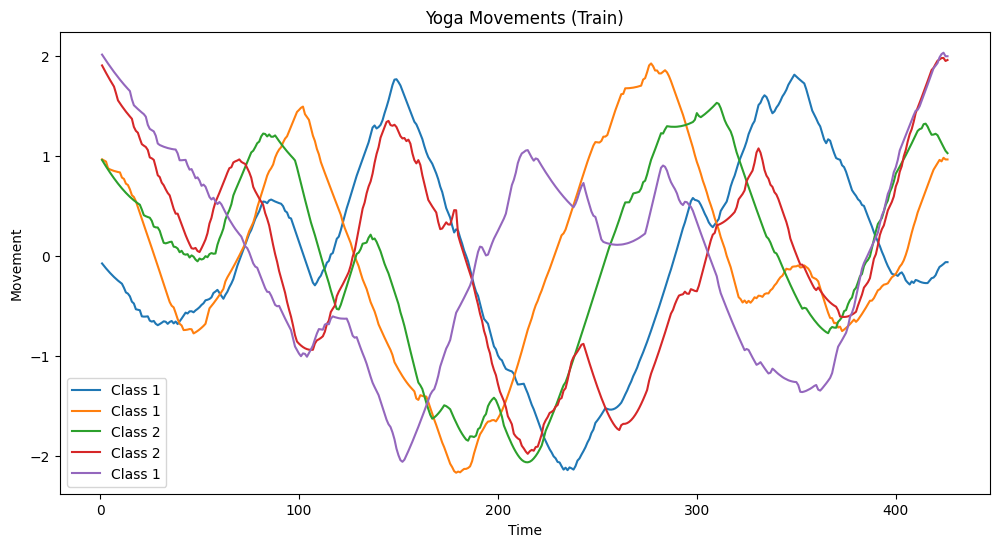

In [3]:
# Графики для Wine Train
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.plot(wine_train.iloc[i, 1:], label=f'Class {wine_train.iloc[i, 0]}')
plt.title('Wine Spectrograms (Train)')
plt.xlabel('Wavelength')
plt.ylabel('Absorption')
plt.legend()
plt.show()

# Графики для Yoga Train
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.plot(yoga_train.iloc[i, 1:], label=f'Class {yoga_train.iloc[i, 0]}')
plt.title('Yoga Movements (Train)')
plt.xlabel('Time')
plt.ylabel('Movement')
plt.legend()
plt.show()

Обучение модели для wine

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Разделение данных
X_train = wine_train.iloc[:, 1:]
y_train = wine_train.iloc[:, 0]
X_test = wine_test.iloc[:, 1:]
y_test = wine_test.iloc[:, 0]

# Обучение модели
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Предсказание и оценка
y_pred = model.predict(X_test)
print(f'Accuracy for Wine: {accuracy_score(y_test, y_pred)}')


Accuracy for Wine: 0.8148148148148148


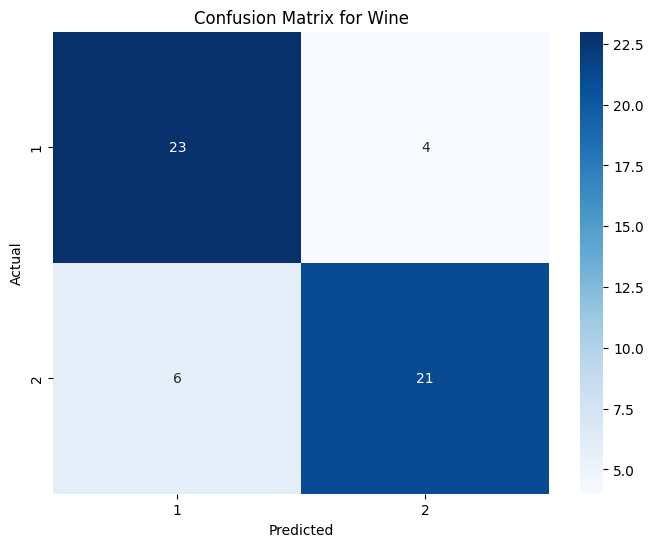

In [7]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Предсказание
y_pred_wine = model.predict(X_test)

# Матрица ошибок
cm_wine = confusion_matrix(y_test, y_pred_wine)

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(cm_wine, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('Confusion Matrix for Wine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Обучение модели для yoga

In [8]:

X_train = yoga_train.iloc[:, 1:]
y_train = yoga_train.iloc[:, 0]
X_test = yoga_test.iloc[:, 1:]
y_test = yoga_test.iloc[:, 0]

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f'Accuracy for Yoga: {accuracy_score(y_test, y_pred)}')


Accuracy for Yoga: 0.8113333333333334


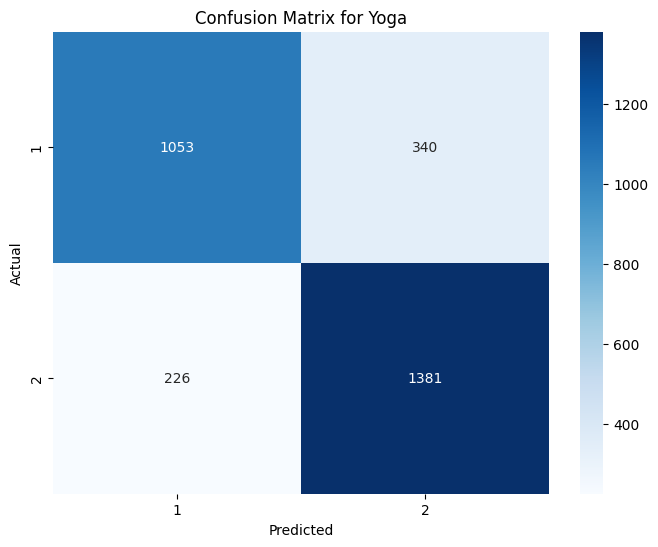

In [9]:
y_pred_yoga = model.predict(X_test)

# Матрица ошибок
cm_yoga = confusion_matrix(y_test, y_pred_yoga)

# Визуализация
plt.figure(figsize=(8, 6))
sns.heatmap(cm_yoga, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y_test.unique()), yticklabels=sorted(y_test.unique()))
plt.title('Confusion Matrix for Yoga')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

 Доп задание с pytrends
 

In [10]:
from pytrends.request import TrendReq

In [15]:
# Создание объекта TrendReq
pytrends = TrendReq(hl='ru-RU', tz=360)

# Указание ключевых слов и временного интервала
keywords = ["электромобили"]
pytrends.build_payload(keywords, cat=0, timeframe='2015-01-01 2023-01-01', geo='RU', gprop='')

# Задержка для избежания ошибки TooManyRequestsError
time.sleep(5)

# Получение данных о интересе по времени
data = pytrends.interest_over_time()

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['электромобили'], label='Электромобили')
plt.title('Интерес к электромобилям в России (2015-2023)')
plt.xlabel('Дата')
plt.ylabel('Интерес')
plt.legend()
plt.grid(True)
plt.show()


TooManyRequestsError: The request failed: Google returned a response with code 429

In [ ]:
# Получение данных о географическом распределении интереса
pytrends.build_payload(keywords, cat=0, timeframe='today 12-m', geo='RU', gprop='')

# Задержка
time.sleep(5)

# Получение данных
geo_data = pytrends.interest_by_region(resolution='REGION', inc_low_vol=True, inc_geo_code=False)

# Сортировка и выбор топ-10 регионов
geo_data = geo_data.sort_values(by=keywords[0], ascending=False).head(10)

# Построение графика
plt.figure(figsize=(12, 6))
geo_data['электромобили'].plot(kind='bar', color='lightgreen')
plt.title('Интерес к электромобилям по регионам России')
plt.xlabel('Регион')
plt.ylabel('Интерес')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Указание ключевых слов
keywords = ["электромобили", "велосипеды", "самокаты"]

# Построение запроса
pytrends.build_payload(keywords, cat=0, timeframe='today 12-m', geo='RU', gprop='')

# Задержка
time.sleep(5)

# Получение данных
data = pytrends.interest_over_time()

# Построение графика
plt.figure(figsize=(12, 6))
for keyword in keywords:
    plt.plot(data.index, data[keyword], label=keyword)

plt.title('Сравнение интереса к транспорту в России')
plt.xlabel('Дата')
plt.ylabel('Интерес')
plt.legend()
plt.grid(True)
plt.show()
